In [108]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('Datasets/Thyroid_Diff.csv')

In [110]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [111]:
# Assuming the target column is named 'Recurrence' and it is binary (0 or 1)
target_column = 'Recurred'

# Identify the feature columns (all columns except the target column)
feature_columns = df.columns.drop(target_column)

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Convert the target variable from 'No'/'Yes' to 0/1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One hot encode categorical features
encoder = OneHotEncoder(drop='first')

# Fit and transform the features
X_encoded = encoder.fit_transform(X)

# Get the feature names after one hot encoding
feature_names = encoder.get_feature_names_out(input_features=feature_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [112]:
accuracy

0.961038961038961

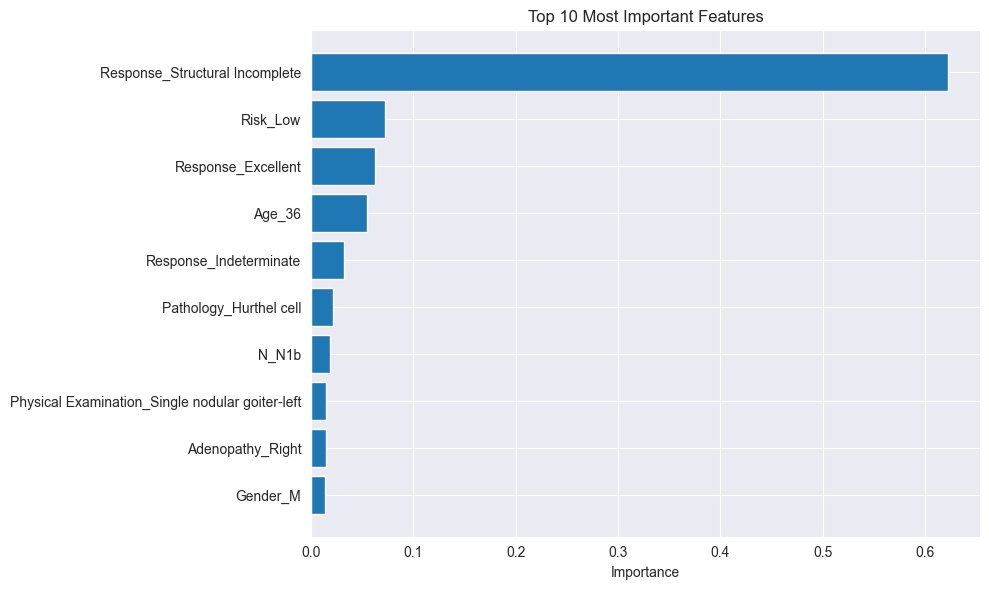

In [117]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Select top 10 most important features
top_indices = indices[:10]
top_importances = importances[top_indices]
top_feature_names = [feature_names[i] for i in top_indices]

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), top_feature_names)
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.tight_layout()
plt.show()